In [ ]:
!pip install polars

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
import statsmodels.tsa.stattools as sts 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf

# pip install pmdarima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [ ]:
df = pd.read_excel("/content/DS3_C6_S4_TimeSeries_Sales_Data_Project.xls",parse_dates=["Order Date"])
pd.set_option("max_rows",1000)
pd.set_option("max_columns",1000)

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
df = df.set_index(df["Order Date"])
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2016-06-12,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
2015-10-11,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2015-10-11,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [ ]:
df.sort_index(inplace=True)

FURNITURE

In [ ]:
df_furniture = df[df["Category"]=="Furniture"].loc[:,["Category","Sales"]]
df_furniture

,Category,Sales
Order Date,,
2014-01-06,Furniture,2573.820
2014-01-07,Furniture,76.728
2014-01-10,Furniture,51.940
2014-01-11,Furniture,9.940
2014-01-13,Furniture,545.940
...,...,...
2017-12-29,Furniture,300.980
2017-12-29,Furniture,68.460
2017-12-29,Furniture,393.568


In [ ]:
df_furniture1 = df_furniture["Sales"]
df_furniture1.head()

Order Date
2014-01-06    2573.820
2014-01-07      76.728
2014-01-10      51.940
2014-01-11       9.940
2014-01-13     545.940
Name: Sales, dtype: float64

In [ ]:
furni_monthly = df_furniture1.resample('M').sum()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

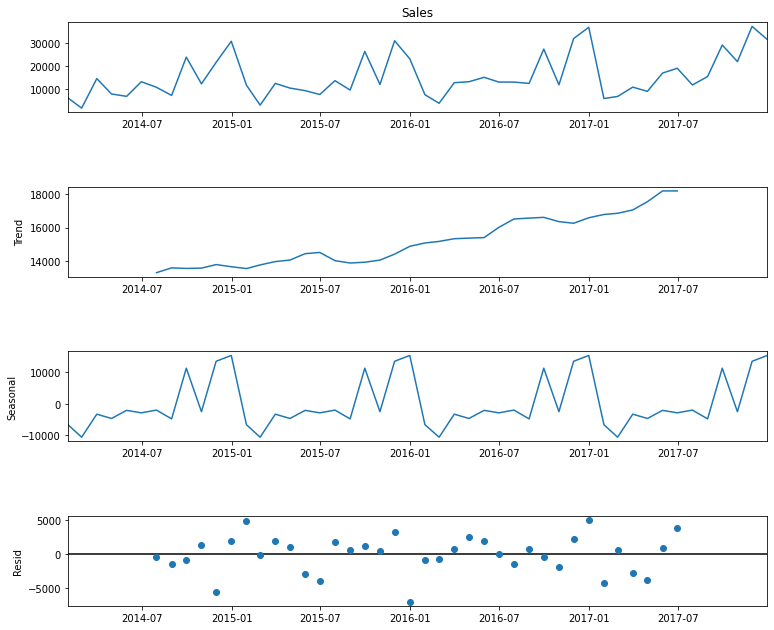

In [ ]:
df_mul = seasonal_decompose(furni_monthly,period=12)
fig = df_mul.plot()
fig.set_size_inches(12,10)

## LOG TRANSFORMATION

In [ ]:
# log transformation
fun_log = np.log(furni_monthly)

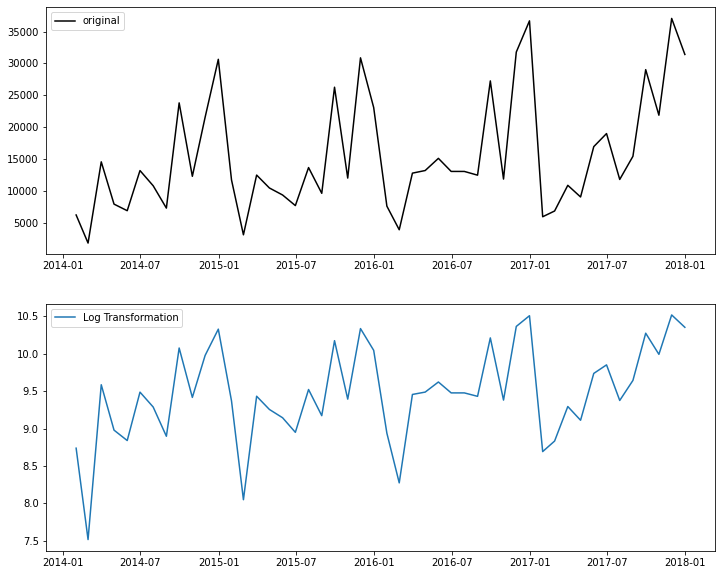

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(furni_monthly, label= 'original',color="black")
plt.legend()
plt.subplot(212)
plt.plot(fun_log, label='Log Transformation')
plt.legend()  
plt.show()

In [ ]:
def stationary(value):
  roll_mean = value.rolling(window=12).mean()
  roll_std = value.rolling(window=12).std()
  #---- plotting-----
  plt.figure(figsize=(12,8))
  orig = plt.plot(value, color='blue',label='Original')
  mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
  std = plt.plot(roll_std, color='black', label = 'Rolling Std')
  plt.legend()
  plt.show()

  #--- adfuller test 
  dftest = adfuller(value)[1]
  dftest1 = adfuller(value)[3]
  print("Number of lags : ",dftest1)

  if dftest<0.05:
    msg = f"Data is Stationry {dftest}"
  else:
    msg=f"Data is not Stationary"

  return msg

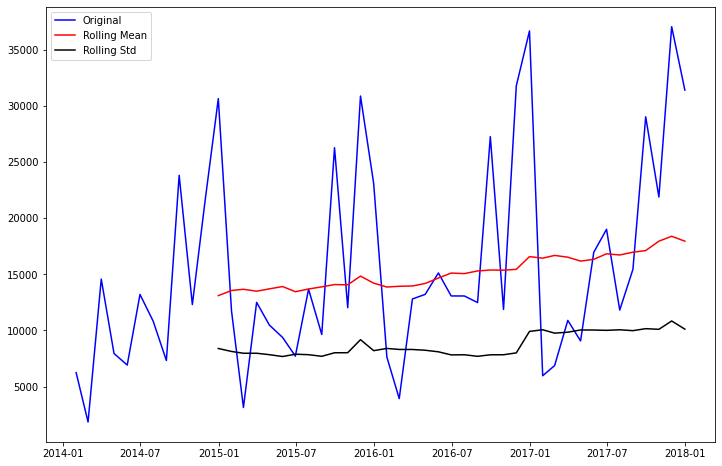

Number of lags :  47


'Data is Stationry 8.450793985809654e-05'

In [ ]:
stationary(furni_monthly)

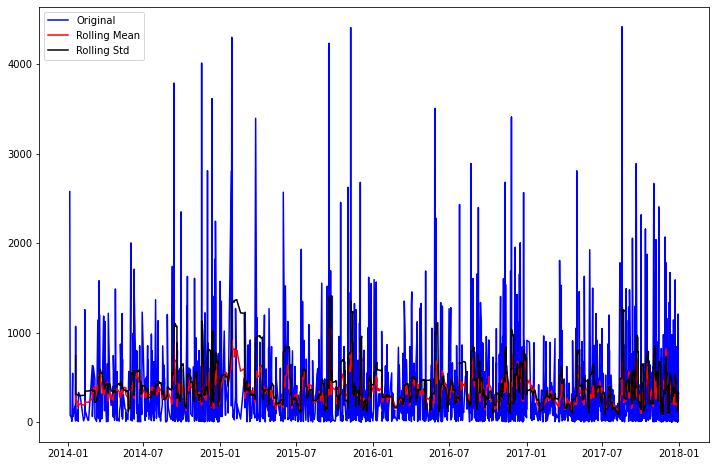

Number of lags :  2117


'Data is Stationry 0.0'

In [ ]:
stationary(df_furniture1)

In [ ]:
def plot(value):
  fig=plt.figure(figsize=(12,10))
  ax1 = fig.add_subplot(211)
  plot_acf(value,lags=20,ax=ax1)
  ax2=fig.add_subplot(212)
  plot_pacf(value,lags=20,ax=ax2)
  return


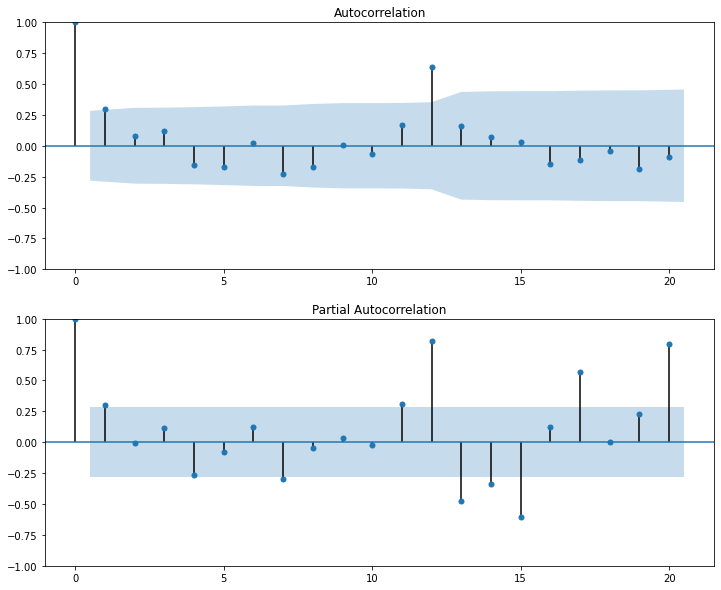

In [ ]:
# RAW DATA
plot(furni_monthly)

## SPLITING INTO 70/30

In [ ]:
ss = int(len(furni_monthly)*0.8)
train = furni_monthly.iloc[:ss]
test = furni_monthly.iloc[ss:]

In [ ]:
print(f"{len(train)}  {len(test)}")

38  10


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
p = [1,2,3,4,5,6,7,8,9]
q = [1,2]
d = [0]
for i in p:
  for j in d:
    for k in q:
       model_arma = ARIMA(train,order=(i,j,k))
       m1 = model_arma.fit()
       print((i,j,k),f"AIC value {m1.aic}")


(1, 0, 1) AIC value 802.5188679959911
(1, 0, 2) AIC value 803.781605652031
(2, 0, 1) AIC value 804.5110265113581
(2, 0, 2) AIC value 805.7445365686602
(3, 0, 1) AIC value 806.1209153217029
(3, 0, 2) AIC value 807.5940298769872
(4, 0, 1) AIC value 804.1641975773717
(4, 0, 2) AIC value 802.9531649903142
(5, 0, 1) AIC value 804.5687885506179
(5, 0, 2) AIC value 805.8588973255196
(6, 0, 1) AIC value 806.5888111722381
(6, 0, 2) AIC value 807.6285868732629
(7, 0, 1) AIC value 806.7114444130162
(7, 0, 2) AIC value 804.7413641067639
(8, 0, 1) AIC value 808.7639475460757
(8, 0, 2) AIC value 809.6344074420001
(9, 0, 1) AIC value 809.8250979317401
(9, 0, 2) AIC value 805.6720813822635


## ARMA MODEL

In [ ]:
model_final = ARIMA(train,order=(9,0,2))
m1 = model_final.fit()
print(m1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   38
Model:                 ARIMA(9, 0, 2)   Log Likelihood                -389.836
Date:                Tue, 31 Jan 2023   AIC                            805.672
Time:                        13:41:38   BIC                            826.961
Sample:                    01-31-2014   HQIC                           813.246
                         - 02-28-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.42e+04   1286.112     11.038      0.000    1.17e+04    1.67e+04
ar.L1          0.7478      0.475      1.575      0.115      -0.183       1.678
ar.L2         -0.9485      0.372     -2.548      0.0

In [ ]:
pvalue = sm.stats.acorr_ljungbox(m1.resid , lags = [1] , return_df = True)['lb_pvalue'].values
print(pvalue)
if pvalue < 0.05:
    print('Reject H0 . Bad Model')
    
else:
    print('Failed to reject H0. Hence the selected model is good')

[0.86848309]
Failed to reject H0. Hence the selected model is good


In [ ]:
start = len(train)
end = len(train)+len(test)-1
print(f"{start} -------------------{end}")
prediction = m1.predict(start,end)
prediction

38 -------------------47


2017-03-31    14630.644368
2017-04-30     3522.340934
2017-05-31    10789.726441
2017-06-30    11600.584952
2017-07-31     5700.847635
2017-08-31    13095.844331
2017-09-30    14275.667053
2017-10-31    15938.275703
2017-11-30    27816.820092
2017-12-31    23315.028939
Freq: M, Name: predicted_mean, dtype: float64

In [ ]:
actual = []
predict = []

for i in range(len(prediction)):
  actual.append(test[i])
  predict.append(prediction[i])
  df0 = pd.DataFrame({"ACTUAL":actual,"PREDICTION":predict})
  df0["error"] = df0["ACTUAL"] - df0["PREDICTION"]

df0

,ACTUAL,PREDICTION,error
0,10893.4448,14630.644368,-3737.199568
1,9065.9581,3522.340934,5543.617166
2,16957.5582,10789.726441,6167.831759
3,19008.5867,11600.584952,7408.001748
4,11813.0220,5700.847635,6112.174365
5,15441.8740,13095.844331,2346.029669
6,29028.2060,14275.667053,14752.538947
7,21884.0682,15938.275703,5945.792497
8,37056.7150,27816.820092,9239.894908
9,31407.4668,23315.028939,8092.437861


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df0["ACTUAL"], df0["PREDICTION"])
rmse = np.sqrt(mean_squared_error(df0["ACTUAL"], df0["PREDICTION"]))

print(f"MSE---->{mse} ---> RMSE {rmse}")

MSE---->58433458.33417036 ---> RMSE 7644.17806792662


In [ ]:
forecast = m1.predict(start= len(furni_monthly), end= (len(furni_monthly)+25),dynamic=True)
print(forecast)

2018-01-31    13905.082458
2018-02-28    13737.687188
2018-03-31    11026.948322
2018-04-30    11070.551010
2018-05-31    14632.215514
2018-06-30    10895.887124
2018-07-31     8969.729598
2018-08-31    10337.920222
2018-09-30    10931.493344
2018-10-31    16719.020991
2018-11-30    21862.000754
2018-12-31    19248.411697
2019-01-31    16045.093703
2019-02-28    13684.914760
2019-03-31    12337.939524
2019-04-30    14596.762731
2019-05-31    15399.680435
2019-06-30    12814.815709
2019-07-31    10782.477739
2019-08-31     9536.660446
2019-09-30    11015.466143
2019-10-31    15710.221734
2019-11-30    18398.882292
2019-12-31    17583.963961
2020-01-31    15432.581307
2020-02-29    13277.373456
Freq: M, Name: predicted_mean, dtype: float64


In [ ]:
X= furni_monthly.append(forecast)

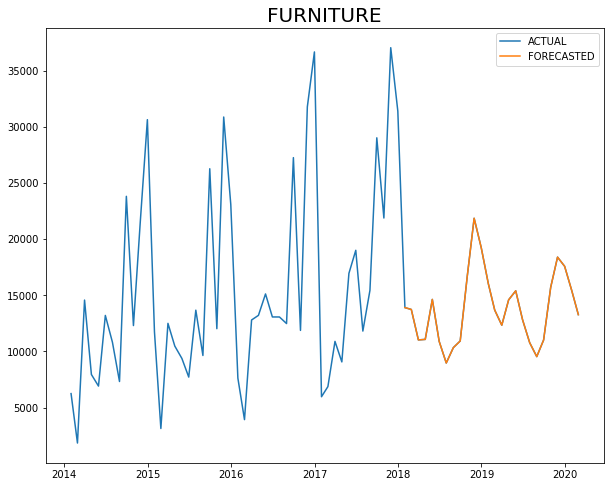

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(X,label="ACTUAL")
plt.plot(forecast,label="FORECASTED")
plt.legend()
plt.title("FURNITURE",fontsize=20)
plt.show()

## **TECHNOLOGY**

In [ ]:
df_tech = df[df["Category"]=="Technology"].loc[:,["Category","Sales"]]
df_tech

,Category,Sales
Order Date,,
2014-01-06,Technology,391.980
2014-01-06,Technology,755.960
2014-01-09,Technology,31.200
2014-01-13,Technology,646.740
2014-01-15,Technology,149.950
...,...,...
2017-12-25,Technology,120.000
2017-12-27,Technology,164.388
2017-12-28,Technology,14.850


In [ ]:
df_tech1 = df_tech["Sales"]
df_tech1.head()

Order Date
2014-01-06    391.98
2014-01-06    755.96
2014-01-09     31.20
2014-01-13    646.74
2014-01-15    149.95
Name: Sales, dtype: float64

In [ ]:
tech_monthly = df_tech1.resample('M').sum()

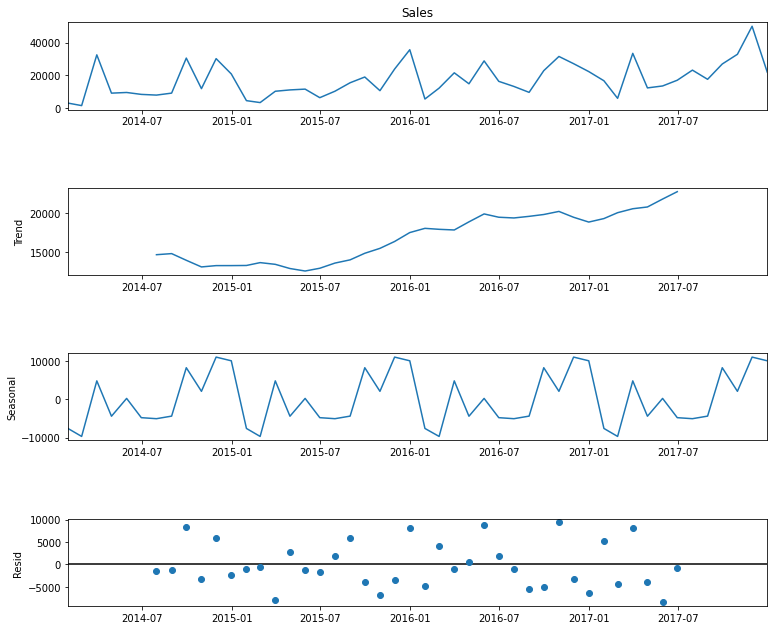

In [ ]:
df_mul = seasonal_decompose(tech_monthly,period=12)
fig = df_mul.plot()
fig.set_size_inches(12,10)

## LOG TRANSFORMATION

In [ ]:
# log transformation
tech_log = np.log(tech_monthly)

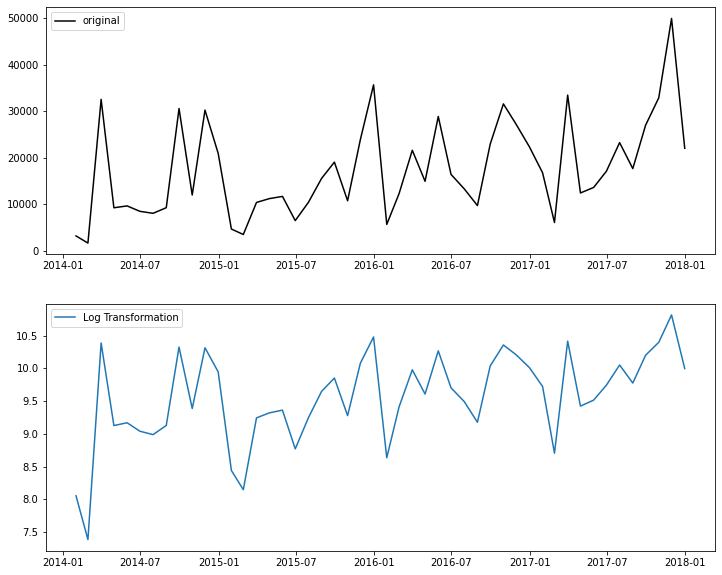

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(tech_monthly, label= 'original',color="black")
plt.legend()
plt.subplot(212)
plt.plot(tech_log, label='Log Transformation')
plt.legend()  
plt.show()

In [ ]:
moving_avg = tech_log.rolling(window = 12).mean()

In [ ]:
moving_avg_diff = tech_log - moving_avg
moving_avg_diff.dropna(inplace = True)

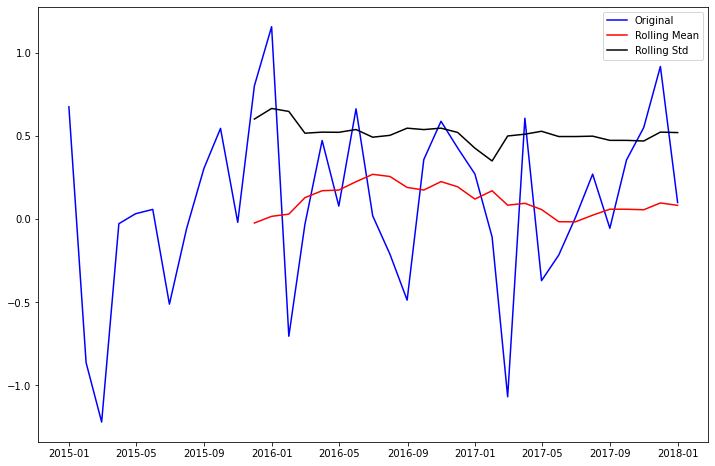

Number of lags :  36


'Data is Stationry 5.593498232177467e-06'

In [ ]:
stationary(moving_avg_diff)

EXPONENTIAL SMOOTHING

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

In [ ]:
model3 = ExponentialSmoothing(tech_monthly,trend='add',seasonal='add',seasonal_periods = 12).fit()
print(model3)

In [ ]:
mod_pred = model3.fittedvalues

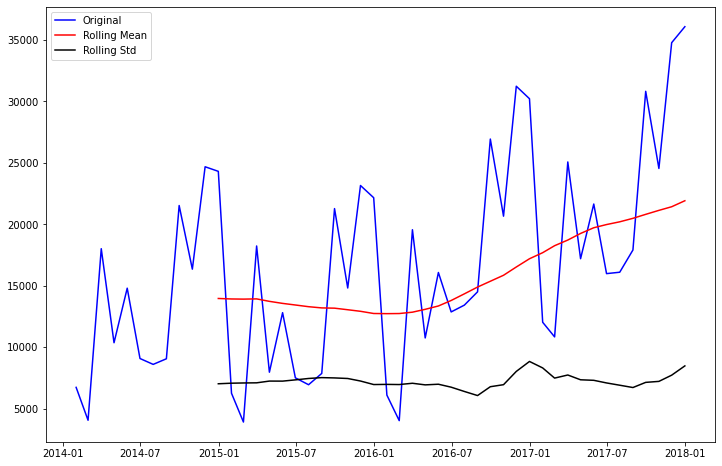

Number of lags :  37


'Data is not Stationary'

In [ ]:
stationary(mod_pred)

## PLOTTING ACF, PACF

In [ ]:
def plot(value):
  fig=plt.figure(figsize=(12,10))
  ax1 = fig.add_subplot(211)
  plot_acf(value,lags=20,ax=ax1)
  ax2=fig.add_subplot(212)
  plot_pacf(value,lags=20,ax=ax2)
  return


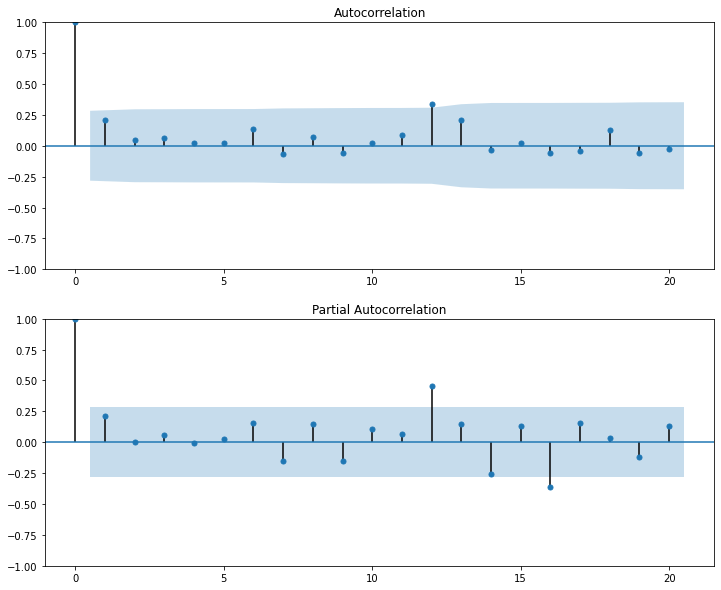

In [ ]:
plot(tech_monthly)

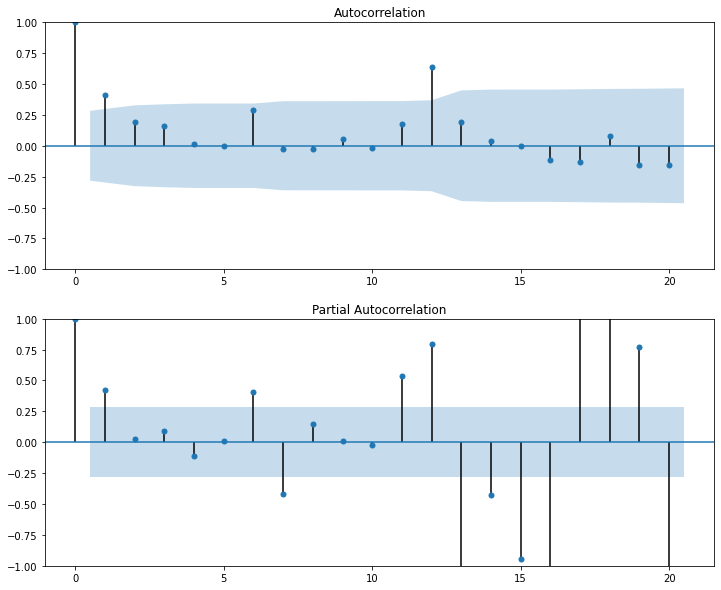

In [ ]:
plot(mod_pred)

In [ ]:
ss = int(len(mod_pred)*0.8)
train1 = mod_pred.iloc[:ss]
test1= mod_pred.iloc[ss:]

In [ ]:
q = [1,2,3,4]
p = [1,2,3,4,5,6,7,8,9,10,11,12,13]
d = [1]
for i in p:
  for j in q:
    for k in d:
       model_arma = ARIMA(train1,order=(i,j,k))
       m1 = model_arma.fit()
       print((i,j,k),f"AIC value {m1.aic}")


(1, 1, 1) AIC value 772.0357271914983
(1, 2, 1) AIC value 761.021065122491
(1, 3, 1) AIC value 761.7488827302094
(1, 4, 1) AIC value 771.3559741174571
(2, 1, 1) AIC value 773.9684271329492
(2, 2, 1) AIC value 763.3189746927361
(2, 3, 1) AIC value 754.7405283147991
(2, 4, 1) AIC value 756.6689683924756
(3, 1, 1) AIC value 775.8648718482469
(3, 2, 1) AIC value 765.2490695847806
(3, 3, 1) AIC value 757.0567573287968
(3, 4, 1) AIC value 749.3823253439588
(4, 1, 1) AIC value 777.0643825952611
(4, 2, 1) AIC value 767.2511756059921
(4, 3, 1) AIC value 758.9796028499946
(4, 4, 1) AIC value 751.5662521685076
(5, 1, 1) AIC value 766.0832999705801
(5, 2, 1) AIC value 755.5379503331212
(5, 3, 1) AIC value 742.8349505737006
(5, 4, 1) AIC value 740.2719402159041
(6, 1, 1) AIC value 766.8284929779929
(6, 2, 1) AIC value 754.463470823066
(6, 3, 1) AIC value 744.5020771213578
(6, 4, 1) AIC value 739.6721925852463
(7, 1, 1) AIC value 768.3572013135114
(7, 2, 1) AIC value 754.5925890606162
(7, 3, 1) AIC 

In [ ]:
model_final2 = ARIMA(train1,order=(1,1,1))
m2 = model_final2.fit()
print(m2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   38
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -383.018
Date:                Tue, 31 Jan 2023   AIC                            772.036
Time:                        13:42:32   BIC                            776.868
Sample:                    01-31-2014   HQIC                           773.739
                         - 02-28-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3205      0.315      1.019      0.308      -0.296       0.937
ma.L1         -0.9113      0.161     -5.652      0.000      -1.227      -0.595
sigma2      6.531e+07   1.13e-09   5.76e+16      0.0

In [ ]:
final1 = sm.tsa.statespace.SARIMAX(train1,order=(1,1,1),seasonal_order=(0,1,0,12)).fit()
print(final1.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   38
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                -212.577
Date:                             Tue, 31 Jan 2023   AIC                            431.154
Time:                                     13:42:32   BIC                            434.811
Sample:                                 01-31-2014   HQIC                           432.169
                                      - 02-28-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0709      7.925      0.009      0.993     -15.463      15.604
ma.L1         -0.0871      

In [ ]:
pvalue = sm.stats.acorr_ljungbox(final1.resid , lags = [1] , return_df = True)['lb_pvalue'].values
print(pvalue)
if pvalue < 0.05:
    print('Reject H0 . Bad Model')
    
else:
    print('Failed to reject H0. Hence the selected model is good')

[0.08497842]
Failed to reject H0. Hence the selected model is good


In [ ]:
start = len(train1)
end = len(train1)+len(test1)-1
print(f"{start} -------------------{end}")
prediction1 = final1.predict(start,end)
prediction1

38 -------------------47


2017-03-31    26364.579683
2017-04-30    17555.996692
2017-05-31    22882.687066
2017-06-30    19673.339095
2017-07-31    20227.046971
2017-08-31    21309.654858
2017-09-30    33744.582917
2017-10-31    27466.918950
2017-11-30    38042.585898
2017-12-31    37025.954489
Freq: M, Name: predicted_mean, dtype: float64

In [ ]:
actual = []
predict = []

for i in range(len(prediction1)):
  actual.append(test1[i])
  predict.append(prediction1[i])
  df1 = pd.DataFrame({"ACTUAL":actual,"PREDICTION":predict})
  df1["error"] = df1["ACTUAL"] - df1["PREDICTION"]

df1

,ACTUAL,PREDICTION,error
0,25075.733907,26364.579683,-1288.845775
1,17200.790683,17555.996692,-355.206009
2,21651.053668,22882.687066,-1231.633398
3,15986.548492,19673.339095,-3686.790603
4,16100.544475,20227.046971,-4126.502496
5,17909.413973,21309.654858,-3400.240885
6,30825.031964,33744.582917,-2919.550954
7,24546.439045,27466.918950,-2920.479904
8,34782.699041,38042.585898,-3259.886858
9,36085.840929,37025.954489,-940.113560


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df1["ACTUAL"], df1["PREDICTION"])
rmse = np.sqrt(mean_squared_error(df1["ACTUAL"], df1["PREDICTION"]))

print(f"MSE---->{mse} ---> RMSE {rmse}")

MSE---->7404995.791972814 ---> RMSE 2721.212191647835


In [ ]:
forecast1 = final1.predict(start= len(tech_monthly), end= (len(tech_monthly)+24),dynamic=True)

In [ ]:
X1= tech_monthly.append(forecast1)

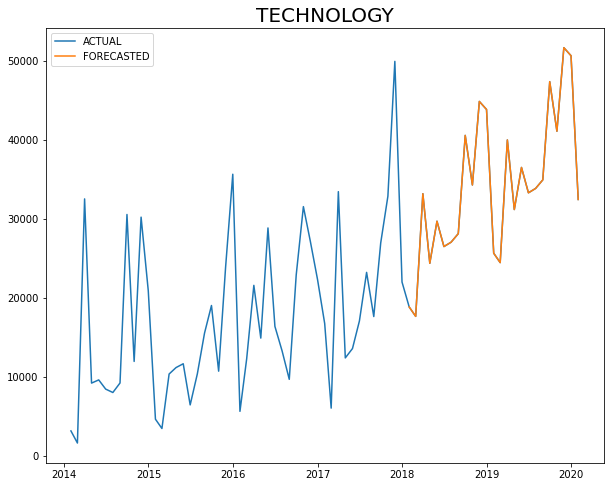

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(X1,label="ACTUAL")
plt.plot(forecast1,label="FORECASTED")
plt.legend()
plt.title("TECHNOLOGY",fontsize=20)
plt.show()

OFFICE SUPPLIES

In [ ]:
df_office = df[df["Category"]=="Office Supplies"].loc[:,["Category","Sales"]]
df_office

,Category,Sales
Order Date,,
2014-01-03,Office Supplies,16.448
2014-01-04,Office Supplies,11.784
2014-01-04,Office Supplies,272.736
2014-01-04,Office Supplies,3.540
2014-01-05,Office Supplies,19.536
...,...,...
2017-12-30,Office Supplies,20.720
2017-12-30,Office Supplies,209.300
2017-12-30,Office Supplies,3.024


In [ ]:
df_office1 = df_office["Sales"]
df_office1.head()

Order Date
2014-01-03     16.448
2014-01-04     11.784
2014-01-04    272.736
2014-01-04      3.540
2014-01-05     19.536
Name: Sales, dtype: float64

In [ ]:
office_monthly = df_office1.resample('M').sum()

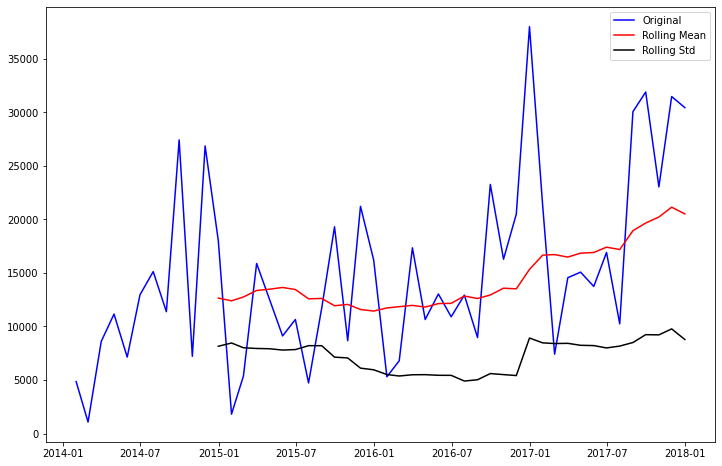

Number of lags :  45


'Data is not Stationary'

In [ ]:
stationary(office_monthly)

In [ ]:
df_diff= office_monthly - office_monthly.shift(1)
df_diff.dropna(inplace=True)

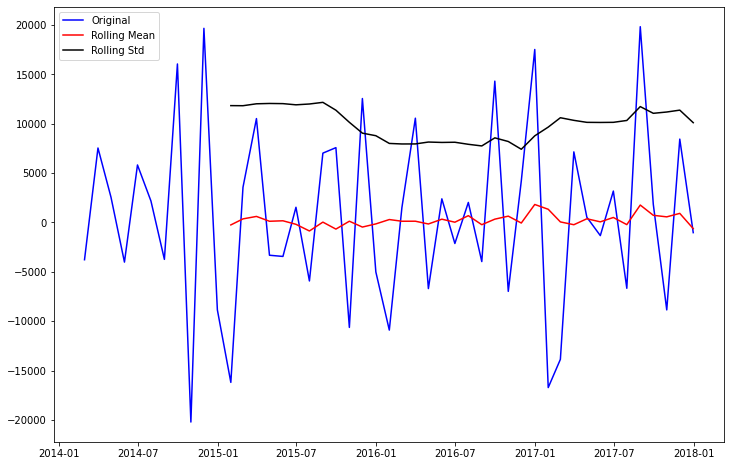

Number of lags :  36


'Data is Stationry 0.00042872624590977896'

In [ ]:
stationary(df_diff)

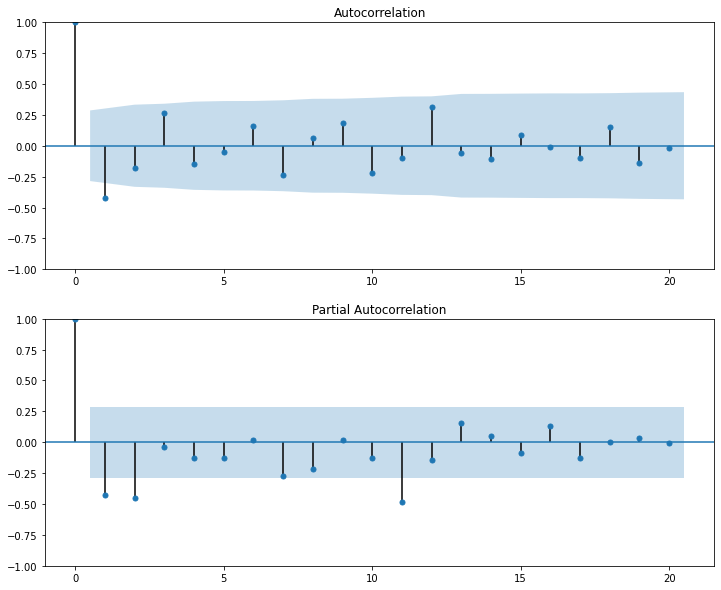

In [ ]:
plot(df_diff)

In [ ]:
ss = int(len(df_diff)*0.8)
train2 = df_diff.iloc[:ss]
test2= df_diff.iloc[ss:]

In [ ]:
q = [1]
p = [1,2,3,4]
d = [1]
for i in p:
  for j in q:
    for k in d:
       model_arma = ARIMA(train2,order=(i,j,k))
       m1 = model_arma.fit()
       print((i,j,k),f"AIC value {m1.aic}")

(1, 1, 1) AIC value 766.5880883793067
(2, 1, 1) AIC value 760.1639604891604
(3, 1, 1) AIC value 762.0278028370652
(4, 1, 1) AIC value 767.3280660316257


In [ ]:
model_final3 = ARIMA(train2,order=(2,1,1))
m3 = model_final3.fit()
print(m3.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   37
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -376.082
Date:                Tue, 31 Jan 2023   AIC                            760.164
Time:                        13:42:34   BIC                            766.498
Sample:                    02-28-2014   HQIC                           762.375
                         - 02-28-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6838      0.139     -4.926      0.000      -0.956      -0.412
ar.L2         -0.5236      0.149     -3.505      0.000      -0.816      -0.231
ma.L1         -0.9999      0.279     -3.580      0.0

In [ ]:
final2 = sm.tsa.statespace.SARIMAX(train1,order=(2,1,1),seasonal_order=(2,1,2,12)).fit()
print(final2.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                   38
Model:             SARIMAX(2, 1, 1)x(2, 1, [1, 2], 12)   Log Likelihood                -209.390
Date:                                 Tue, 31 Jan 2023   AIC                            434.779
Time:                                         13:42:36   BIC                            444.530
Sample:                                     01-31-2014   HQIC                           437.484
                                          - 02-28-2017                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6953      0.362     -1.919      0.055      -1.406       0

In [ ]:
pvalue = sm.stats.acorr_ljungbox(final2.resid , lags = [1] , return_df = True)['lb_pvalue'].values
print(pvalue)
if pvalue < 0.05:
    print('Reject H0 . Bad Model')
    
else:
    print('Failed to reject H0. Hence the selected model is good')

[0.01235836]
Reject H0 . Bad Model


In [ ]:
start = len(train)
end = len(train)+len(test)-1
print(f"{start} ---------   {end}")
prediction3= final2.predict(start,end)
prediction3

38 ---------   47


2017-03-31    26992.898037
2017-04-30    17453.902532
2017-05-31    22969.791644
2017-06-30    19417.136959
2017-07-31    19732.864349
2017-08-31    20955.656531
2017-09-30    34048.412727
2017-10-31    27463.890214
2017-11-30    38224.954104
2017-12-31    37241.155785
Freq: M, Name: predicted_mean, dtype: float64

In [ ]:
actual = []
predict = []

for i in range(len(prediction)):
  actual.append(test[i])
  predict.append(prediction[i])
df02 = pd.DataFrame({"Actual":actual,"Prediction":predict})
df02["error"] = df02["Actual"] - df02["Prediction"]
df02

,Actual,Prediction,error
0,10893.4448,14630.644368,-3737.199568
1,9065.9581,3522.340934,5543.617166
2,16957.5582,10789.726441,6167.831759
3,19008.5867,11600.584952,7408.001748
4,11813.0220,5700.847635,6112.174365
5,15441.8740,13095.844331,2346.029669
6,29028.2060,14275.667053,14752.538947
7,21884.0682,15938.275703,5945.792497
8,37056.7150,27816.820092,9239.894908
9,31407.4668,23315.028939,8092.437861


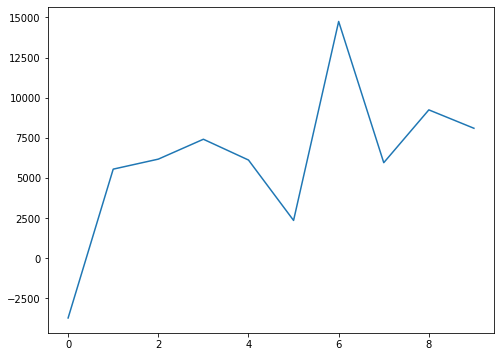

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(df02["error"])
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df02["Actual"], df02["Prediction"])
rmse = np.sqrt(mean_squared_error(df02["Actual"], df02["Prediction"]))

print(f"MSE---->{mse} ---> RMSE {rmse}")

MSE---->58433458.33417036 ---> RMSE 7644.17806792662


In [ ]:
forecast3 = final2.predict(start =len(office_monthly) , end=(len(office_monthly)+30), dynamic=True)

In [ ]:
X= office_monthly.append(forecast3)

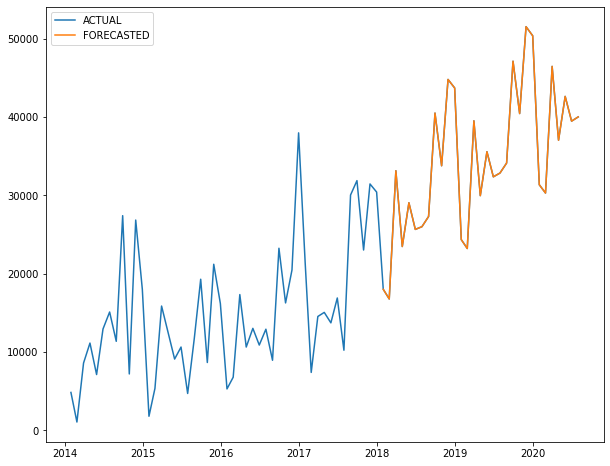

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(X,label="ACTUAL")
plt.plot(forecast3,label= "FORECASTED")
plt.legend()
plt.show()